# RICE LEAF DISEASES PREDICTION

# Data Analysis Report:

## In this data analysis report we can be able to find the types of " Rice Leaf disease ".

# Task

# Benefits:

# Business Analysis :

# Rice is one of the most important staple crops in the world and a major source of food for millions of people.

# Domain analysis :

In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from keras.models import Sequential 
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [3]:
pwd

'C:\\Users\\koustubh\\Downloads'

In [6]:
# using generator as the ram cant work with this large dataset at once so it divides the images in 
# batches and work, as processing on an image is done the new image replaces it 
# position and this continues untill the entire dataset processing is compleleted

In [7]:
from tensorflow import keras

In [8]:
ds = keras.utils.image_dataset_from_directory(
    directory = 'rice_leaf',
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 119 files belonging to 3 classes.


In [9]:
pwd

'C:\\Users\\koustubh\\Downloads'

In [46]:
class_name = ds.class_names
class_name

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

# Insights:
We have divided the types of the diseases

(32, 256, 256, 3)
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


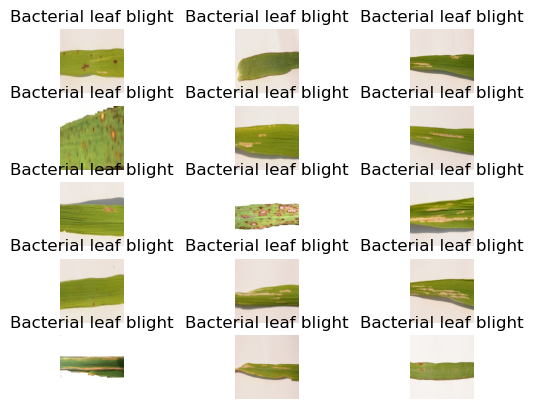

In [51]:
for image_batch, labels_batch in ds.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(15):
        ax= plt.subplot(5,3,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_name[0])
        plt.axis('off')

# Insights:

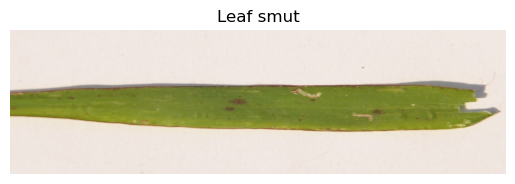

In [54]:
image_path = r"C:\Users\koustubh\Downloads\rice_leaf\Leaf smut\Leaf smut\DSC_0293.JPG"  # Replace with the path to your image
image = cv2.imread(image_path)

# OpenCV loads images in BGR format, so convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.title('Leaf smut')
plt.show()

# Insights :
In the above line of code we have figured out one type of diseases that is:" Leaf smut ". 


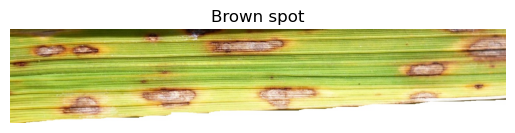

In [56]:
image_path = r"C:\Users\koustubh\Downloads\rice_leaf\Brown spot\Brown spot\DSC_0105.jpg"  # Replace with the path to your image
image = cv2.imread(image_path)

# OpenCV loads images in BGR format, so convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.title('Brown spot')
plt.show()

# Insights :
In the above line of code we have figured out another type of diseases that is:" Brown spot ".


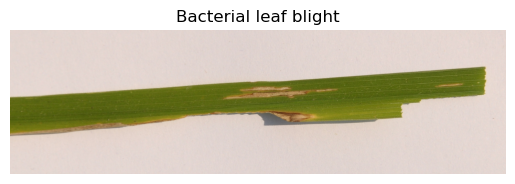

In [55]:
image_path = r"C:\Users\koustubh\Downloads\rice_leaf\Bacterial leaf blight\Bacterial leaf blight\DSC_0365.JPG"  # Replace with the path to your image
image = cv2.imread(image_path)

# OpenCV loads images in BGR format, so convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.title('Bacterial leaf blight')
plt.show()

# Insights :
In the above line of code we have figured out another type of diseases that is:" Bacterial leaf blight ".



In [10]:
from sklearn.model_selection import train_test_split

In [11]:
ds_list = list(ds.as_numpy_iterator())  # Split the dataset into training and testing sets
images = np.concatenate([x[0] for x in ds_list])
labels = np.concatenate([x[1] for x in ds_list])

train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42)

# Create TensorFlow Datasets from NumPy arrays
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

# Optionally shuffle and batch your datasets
batch_size = 32
train_ds = train_ds.shuffle(buffer_size=len(train_images)).batch(batch_size)
test_ds = test_ds.batch(batch_size)


Found 119 files belonging to 3 classes.


In [40]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [13]:
# stored in numpy array of pixel values from 0 to 255

In [14]:
# normalize for 0 to 1 as now it is from 0 to 255 otherwise results will not be good

In [15]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds= test_ds.map(process)


In [72]:
train_ds

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [16]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
          
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) 
          
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) 
model.add(Dropout(0.4))        
          
model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

num_classes=3
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
h=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
3/3 [==============================] - 12s 3s/step - loss: 2.9178 - accuracy: 0.4211 - val_loss: 2.0969 - val_accuracy: 0.2083
Epoch 2/10
3/3 [==============================] - 5s 2s/step - loss: 1.4395 - accuracy: 0.4211 - val_loss: 1.0760 - val_accuracy: 0.3333
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 1.0995 - accuracy: 0.3684 - val_loss: 1.1344 - val_accuracy: 0.2083
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 1.0631 - accuracy: 0.4316 - val_loss: 1.0635 - val_accuracy: 0.3750
Epoch 5/10
3/3 [==============================] - 5s 2s/step - loss: 1.0208 - accuracy: 0.4211 - val_loss: 1.0590 - val_accuracy: 0.4583
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 0.9708 - accuracy: 0.5368 - val_loss: 1.0270 - val_accuracy: 0.4583
Epoch 7/10
3/3 [==============================] - 5s 2s/step - loss: 0.9260 - accuracy: 0.5158 - val_loss: 1.0060 - val_accuracy: 0.4583
Epoch 8/10
3/3 [========================

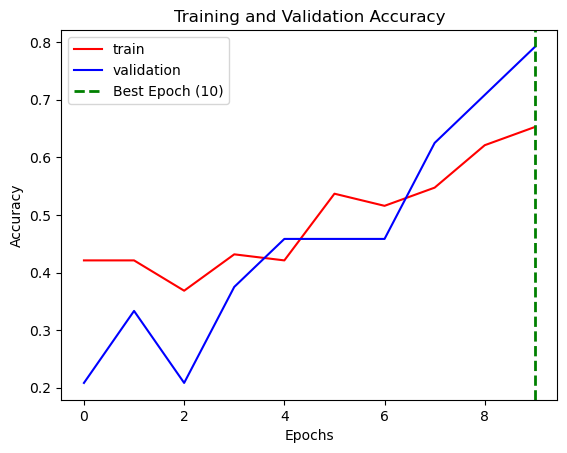

In [22]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(train_accuracy, color='red', label='train')
plt.plot(val_accuracy, color='blue', label='validation')
plt.legend()

# Add labels and a title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Add vertical lines to indicate the best epoch (where validation accuracy is highest)
best_epoch = val_accuracy.index(max(val_accuracy))
plt.axvline(x=best_epoch, color='green', linestyle='--', label=f'Best Epoch ({best_epoch+1})', linewidth=2)
plt.legend()

# Show the plot
plt.show()


# Insights :

## Above code will show the highest accuracy in the coressponding epoch



# Report on techniques uses i.e : " Data Augmentation "

# Why is data augmentation used in deep learning :

# Apply augmentation to a dataset :

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define your data augmentation pipeline
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomZoom(0.2),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
    ]
)

# Define your model
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    layers.Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    layers.Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # Assuming 3 output classes
])

# Compile your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Specify the number of epochs
num_epochs = 10

# Create and configure a data generator using data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=data_augmentation,
    rescale=1./255,  # Rescale pixel values to the range [0, 1]
)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255  # Rescale pixel values for validation set
)
# Load your training dataset using the data generator
train_generator = train_datagen.flow(
    train_images, train_labels,  # Use your modified train data and labels
    batch_size=batch_size,  # Assuming categorical classification
)
val_generator = val_datagen.flow(
    test_images, test_labels,  # Use your modified validation data and labels
    batch_size=batch_size,
)
# Train your model with data augmentation for the specified number of epochs

history1 = model.fit(
    train_generator,
    epochs=num_epochs,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    verbose=1
)


Epoch 1/10
3/3 [==============================] - 14s 4s/step - loss: 1.8373 - accuracy: 0.2947 - val_loss: 1.1094 - val_accuracy: 0.3333
Epoch 2/10
3/3 [==============================] - 10s 3s/step - loss: 1.1248 - accuracy: 0.3474 - val_loss: 1.0978 - val_accuracy: 0.3750
Epoch 3/10
3/3 [==============================] - 10s 3s/step - loss: 1.0744 - accuracy: 0.3579 - val_loss: 1.1012 - val_accuracy: 0.4167
Epoch 4/10
3/3 [==============================] - 10s 3s/step - loss: 1.0317 - accuracy: 0.4737 - val_loss: 1.1105 - val_accuracy: 0.3750
Epoch 5/10
3/3 [==============================] - 10s 3s/step - loss: 0.9735 - accuracy: 0.5263 - val_loss: 1.0306 - val_accuracy: 0.4583
Epoch 6/10
3/3 [==============================] - 10s 3s/step - loss: 0.9386 - accuracy: 0.4947 - val_loss: 0.9704 - val_accuracy: 0.3750
Epoch 7/10
3/3 [==============================] - 11s 4s/step - loss: 0.8779 - accuracy: 0.5579 - val_loss: 0.9128 - val_accuracy: 0.5833
Epoch 8/10
3/3 [==================

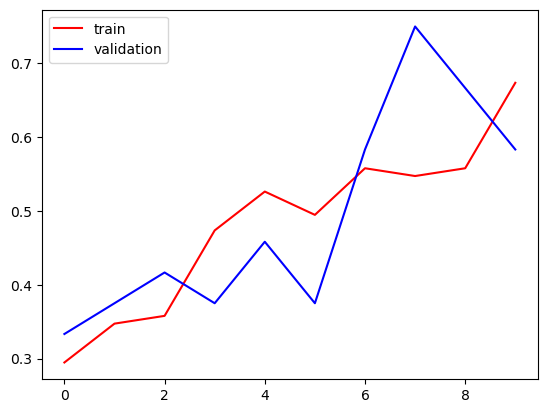

In [24]:
train_accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']

plt.plot(train_accuracy, color='red', label='train')
plt.plot(val_accuracy, color='blue', label='validation')
plt.legend()
plt.show()

# Insights :

In [25]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', save_best_only=True)


hist = model.fit(
    train_ds,
    epochs=50,
    validation_data=test_ds,
    callbacks=[checkpointer],
    verbose=1
)


Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 0.8010 - accuracy: 0.6105

C:\Users\koustubh\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3/3 [==============================] - 6s 2s/step - loss: 0.8010 - accuracy: 0.6105 - val_loss: 0.6317 - val_accuracy: 0.7500
Epoch 2/50
3/3 [==============================] - 5s 2s/step - loss: 0.7378 - accuracy: 0.6632 - val_loss: 0.6925 - val_accuracy: 0.7083
Epoch 3/50
3/3 [==============================] - 5s 2s/step - loss: 0.7193 - accuracy: 0.6526 - val_loss: 0.6630 - val_accuracy: 0.7917
Epoch 4/50
3/3 [==============================] - 5s 2s/step - loss: 0.6165 - accuracy: 0.7474 - val_loss: 0.5683 - val_accuracy: 0.7500
Epoch 5/50
3/3 [==============================] - 5s 2s/step - loss: 0.5946 - accuracy: 0.7474 - val_loss: 0.4937 - val_accuracy: 0.8333
Epoch 6/50
3/3 [==============================] - 5s 2s/step - loss: 0.5437 - accuracy: 0.7684 - val_loss: 0.5478 - val_accuracy: 0.7083
Epoch 7/50
3/3 [==============================] - 5s 2s/step - loss: 0.5504 - accuracy: 0.7789 - val_loss: 0.4484 - val_accuracy: 0.7917
Epoch 8/50
3/3 [==============================] - 5s

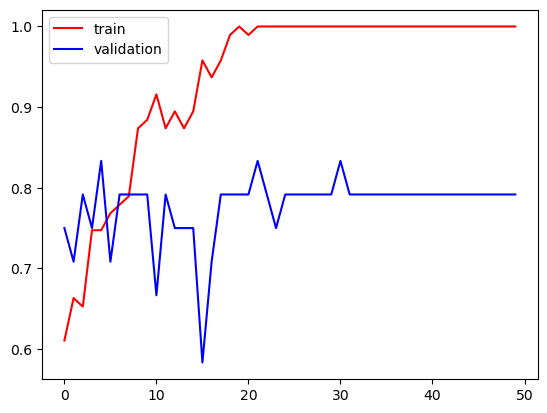

In [26]:
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.plot(train_accuracy, color='red', label='train')
plt.plot(val_accuracy, color='blue', label='validation')
plt.legend()
plt.show()

# Insights :

# To address overfitting

# Hyperparametric optimization  by ADAM optimizer :

## Why we were using ADAM optimizer :

# Adaptive Learning Rates :

# Noisy or Sparse Gradients :



In [27]:
#!pip install keras-tuner

In [28]:
from kerastuner import HyperModel

Using TensorFlow backend


C:\Users\koustubh\AppData\Local\Temp\ipykernel_23124\3925158637.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [29]:
from kerastuner.tuners import RandomSearch 

In [34]:

def build_model(hp): # Define the model-building function for Hyperparameter Tuning
    model = keras.Sequential()

    
    model.add(Conv2D(  # Tune the number of filters in the first convolutional layer
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(256, 256, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    
    model.add(Conv2D( # Tune the number of filters in the second convolutional layer
        filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=32),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    
    model.add(Dense(   # Tune the number of units in the dense layer
        units=hp.Int('dense_units', min_value=64, max_value=256, step=32),
        activation='relu'
    ))

    model.add(Dropout(0.3))  # Add a dropout layer to prevent overfitting

    model.add(Dense(3, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create a Hyperparameter Tuner
tuner = RandomSearch(
    build_model,  # Model-building function
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials as needed
    directory='riceleaf',  # Directory for storing tuner logs and checkpoints
    project_name='diseases'  # Name of your project
)

# Define lists to store accuracy values
train_accuracy = []
val_accuracy = []

# Define a callback to record accuracy during training
class AccuracyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_accuracy.append(logs['accuracy'])
        val_accuracy.append(logs['val_accuracy'])
        print(f'Epoch {epoch + 1}: Train accuracy={logs["accuracy"]}, Validation accuracy={logs["val_accuracy"]}')

# Perform hyperparameter tuning
tuner.search(train_ds, epochs=15, validation_data=test_ds, callbacks=[AccuracyCallback()])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
results = best_model.evaluate(test_ds)
print("Test loss:", results[0])
print("Test accuracy:", results[1])

# Plot training and validation accuracy




Trial 10 Complete [00h 03m 02s]
val_accuracy: 0.8333333134651184

Best val_accuracy So Far: 0.9166666865348816
Total elapsed time: 00h 16m 54s
1/1 [==============================] - 1s 1s/step - loss: 0.5419 - accuracy: 0.9167
Test loss: 0.5419048070907593
Test accuracy: 0.9166666865348816


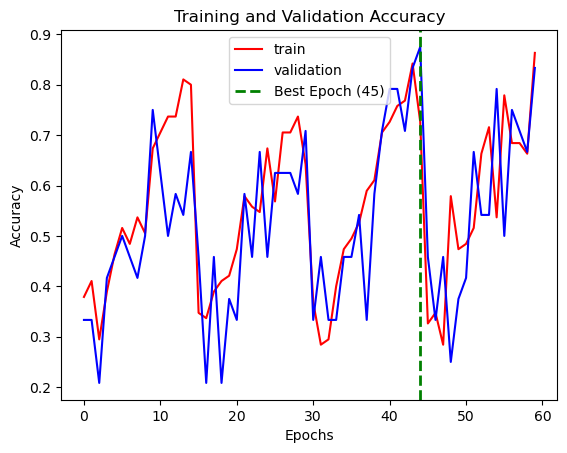

In [36]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(train_accuracy, color='red', label='train')
plt.plot(val_accuracy, color='blue', label='validation')
plt.legend()

# Add labels and a title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

# Add vertical lines to indicate the best epoch (where validation accuracy is highest)
best_epoch = val_accuracy.index(max(val_accuracy))
plt.axvline(x=best_epoch, color='green', linestyle='--', label=f'Best Epoch ({best_epoch+1})', linewidth=2)
plt.legend()

# Show the plot
plt.show()


# Insights :

Reloading Tuner from riceleaf\disesases\tuner0.json
Epoch 1/15
3/3 [==============================] - 17s 4s/step - loss: 5.0347 - accuracy: 0.3158 - val_loss: 1.1055 - val_accuracy: 0.5000
Epoch 2/15
3/3 [==============================] - 10s 3s/step - loss: 1.2874 - accuracy: 0.3895 - val_loss: 1.1236 - val_accuracy: 0.3750
Epoch 3/15
3/3 [==============================] - 9s 3s/step - loss: 1.0848 - accuracy: 0.4526 - val_loss: 1.6647 - val_accuracy: 0.2083
Epoch 4/15
3/3 [==============================] - 9s 3s/step - loss: 1.1923 - accuracy: 0.4526 - val_loss: 1.0655 - val_accuracy: 0.3333
Epoch 5/15
3/3 [==============================] - 8s 3s/step - loss: 1.0351 - accuracy: 0.4316 - val_loss: 1.0642 - val_accuracy: 0.5000
Epoch 6/15
3/3 [==============================] - 8s 3s/step - loss: 0.8871 - accuracy: 0.6316 - val_loss: 0.8948 - val_accuracy: 0.6250
Epoch 7/15
3/3 [==============================] - 9s 3s/step - loss: 0.8306 - accuracy: 0.6105 - val_loss: 0.7848 - val_accu

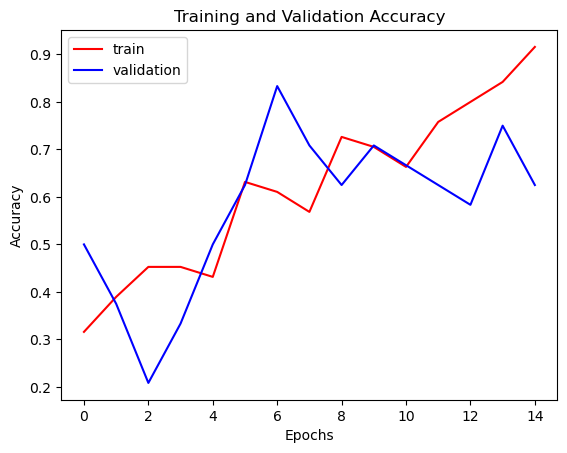

In [31]:
# Define the model-building function for Hyperparameter Tuning
def build_model(hp):
    model = keras.Sequential()

    # Tune the number of filters in the first convolutional layer
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(256, 256, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Tune the number of filters in the second convolutional layer
    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=32),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Tune the number of units in the dense layer
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=32),
        activation='relu'
    ))

    model.add(Dropout(0.3))  # Add a dropout layer to prevent overfitting

    model.add(Dense(3, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create a Hyperparameter Tuner
tuner = RandomSearch(
    build_model,  # Model-building function
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials as needed
    directory='riceleaf',  # Directory for storing tuner logs and checkpoints
    project_name='disesases'  # Name of your project
)

# Define lists to store accuracy values
train_accuracy = []
val_accuracy = []

# Define a callback to record accuracy during training
class AccuracyCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_accuracy.append(logs['accuracy'])
        val_accuracy.append(logs['val_accuracy'])

# Perform hyperparameter tuning
tuner.search(train_ds, epochs=15, validation_data=test_ds, callbacks=[AccuracyCallback()])

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = build_model(best_hps)

# Train the best model
history = best_model.fit(train_ds, epochs=15, validation_data=test_ds)

train_accuracy = best_model.history.history['accuracy']
val_accuracy = best_model.history.history['val_accuracy']

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(train_accuracy, color='red', label='train')
plt.plot(val_accuracy, color='blue', label='validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()


# Insights :

# Using earlystopping to stop at the best accuracy :

In [152]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt

# Define the model-building function for Hyperparameter Tuning
def build_model(hp):
    model = keras.Sequential()

    # Tune the number of filters in the first convolutional layer
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(256, 256, 3)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Tune the number of filters in the second convolutional layer
    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=32),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Tune the number of units in the dense layer
    model.add(Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=32),
        activation='relu'
    ))

    model.add(Dropout(0.3))  # Add a dropout layer to prevent overfitting

    model.add(Dense(3, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create a Hyperparameter Tuner
tuner = RandomSearch(
    build_model,  # Model-building function
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials as needed
    directory='riceleaf',  # Directory for storing tuner logs and checkpoints
    project_name='disesases'  # Name of your project
)

# Define lists to store accuracy values
train_accuracy = []
val_accuracy = []

# Define early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = build_model(best_hps)

# Train the best model
history1 = best_model.fit(train_ds, epochs=15, validation_data=test_ds)
# Perform hyperparameter tuning
tuner.search(train_ds, epochs=50, validation_data=test_ds, callbacks=[early_stopping])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model
results = best_model.evaluate(test_ds)
print("Test loss:", results[0])
print("Test accuracy:", results[1])




Reloading Tuner from riceleaf\disesases\tuner0.json
Epoch 1/15
3/3 [==============================] - 16s 4s/step - loss: 4.0275 - accuracy: 0.3474 - val_loss: 1.0615 - val_accuracy: 0.4583
Epoch 2/15
3/3 [==============================] - 11s 4s/step - loss: 1.1502 - accuracy: 0.2947 - val_loss: 1.2182 - val_accuracy: 0.2083
Epoch 3/15
3/3 [==============================] - 11s 4s/step - loss: 1.1109 - accuracy: 0.3684 - val_loss: 1.1220 - val_accuracy: 0.2083
Epoch 4/15
3/3 [==============================] - 11s 4s/step - loss: 1.0673 - accuracy: 0.4105 - val_loss: 1.0662 - val_accuracy: 0.4583
Epoch 5/15
3/3 [==============================] - 11s 4s/step - loss: 1.0788 - accuracy: 0.4316 - val_loss: 1.0737 - val_accuracy: 0.3750
Epoch 6/15
3/3 [==============================] - 14s 5s/step - loss: 1.0423 - accuracy: 0.4842 - val_loss: 1.2265 - val_accuracy: 0.2083
Epoch 7/15
3/3 [==============================] - 14s 4s/step - loss: 0.9931 - accuracy: 0.4211 - val_loss: 1.0360 - val

# Here: Accuracy: 0.8333

# Random Forest :

In [65]:
pwd

'C:\\Users\\koustubh\\Downloads'

In [ ]:
# now using ML models 

In [77]:
import tensorflow as tf
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

# Assuming you have already loaded your image dataset and split it into train_ds and test_ds

# Convert TensorFlow Datasets to NumPy arrays
train_images, train_labels = [], []
for image, label in train_ds:
    train_images.append(image.numpy())
    train_labels.append(label.numpy())

train_images = np.vstack(train_images)
train_labels = np.vstack(train_labels)

test_images, test_labels = [], []
for image, label in test_ds:
    test_images.append(image.numpy())
    test_labels.append(label.numpy())

test_images = np.vstack(test_images)
test_labels = np.vstack(test_labels)

# Reshape images to flatten them
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
clf.fit(train_images, train_labels)

# Make predictions on the test data
y_pred = clf.predict(test_images)

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy}")
f1score=f1_score(test_labels, y_pred,)
print(f"f1score: {f1score}")

Accuracy: 0.5416666666666666
f1score: 0.6763392857142857


In [80]:
f1score=f1_score(test_labels, y_pred,average='weighted')
print(f"f1score: {f1score}")

f1score: 0.6763392857142857


In [89]:
from sklearn.metrics import confusion_matrix, classification_report,f1_score,precision_score
precision=precision_score(test_labels, y_pred,average='macro') # 72 percent of postive prediction are actually true
precision
classificationreport=classification_report(test_labels, y_pred)
print(f"classificationreport: {classificationreport}")

classificationreport:               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.67      0.40      0.50         5
           2       1.00      0.45      0.62        11

   micro avg       0.93      0.54      0.68        24
   macro avg       0.89      0.53      0.66        24
weighted avg       0.93      0.54      0.68        24
 samples avg       0.54      0.54      0.54        24



C:\Users\koustubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
precision=precision_score(test_labels, y_pred,average='macro') # 72 percent of postive prediction are actually true
precision

0.8888888888888888

# Hyperparametric tunning Random forest :

In [97]:
param_grid = {
    'n_estimators': [100, 200],           # Number of trees in the forest
    'max_depth': [None, 10],              # Maximum depth of the trees
    'min_samples_split': [2, 5],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],          # Minimum number of samples required to be in a leaf node
    'bootstrap': [True, False]
}

In [98]:
rf_clf = RandomForestClassifier()

In [100]:
from sklearn.model_selection import RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=param_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [101]:
rf_cv.fit(train_images, train_labels)
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters

C:\Users\koustubh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 32 is smaller than n_iter=100. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\koustubh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best paramters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True})


In [102]:
rf_clf1= RandomForestClassifier()

In [103]:
rf_clf1=RandomForestClassifier(**rf_best_params)

In [105]:
rf_clf1.fit(train_images, train_labels)

RandomForestClassifier()

In [106]:
rf1_p_test=rf_clf1.predict(test_images)

In [108]:
print(classification_report(test_labels,rf1_p_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.67      0.40      0.50         5
           2       1.00      0.45      0.62        11

   micro avg       0.93      0.58      0.72        24
   macro avg       0.89      0.58      0.69        24
weighted avg       0.93      0.58      0.70        24
 samples avg       0.58      0.58      0.58        24



C:\Users\koustubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
precision=precision_score(test_labels, rf1_p_test,average='weighted') # 93 percent of postive prediction are actually true
precision

0.9305555555555555

In [128]:
accuracy = accuracy_score(test_labels, rf1_p_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5833333333333334


In [129]:
f1score=f1_score(test_labels, rf1_p_test,average='weighted')
print(f"f1score: {f1score}")

f1score: 0.7017361111111112


In [139]:
print(classification_report(test_labels,rf1_p_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.67      0.40      0.50         5
           2       1.00      0.45      0.62        11

   micro avg       0.93      0.58      0.72        24
   macro avg       0.89      0.58      0.69        24
weighted avg       0.93      0.58      0.70        24
 samples avg       0.58      0.58      0.58        24



C:\Users\koustubh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using Logistic Regression :

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming you have already loaded your image dataset and split it into train_images, test_images, train_labels, and test_labels
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)# Create a Multinomial Logistic Regression model
train_labels_flat = train_labels.argmax(axis=1)# Flatten the labels (convert to 1D array)
test_labels_flat = test_labels.argmax(axis=1)
LR.fit(train_images, train_labels_flat) # Fit the model to the training data
y_pred = LR.predict(test_images) # Make predictions on the test data
accuracy = accuracy_score(test_labels_flat, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.75


In [133]:
precision = precision_score(test_labels_flat, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')


Precision: 0.75


In [134]:
f1score=f1_score(test_labels_flat, y_pred,average='weighted')
print(f"f1score: {f1score}")

f1score: 0.7503623188405797


In [135]:
print(classification_report(test_labels_flat,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.60      0.60      0.60         5
           2       0.75      0.82      0.78        11

    accuracy                           0.75        24
   macro avg       0.74      0.72      0.73        24
weighted avg       0.75      0.75      0.75        24



# ROC curve 

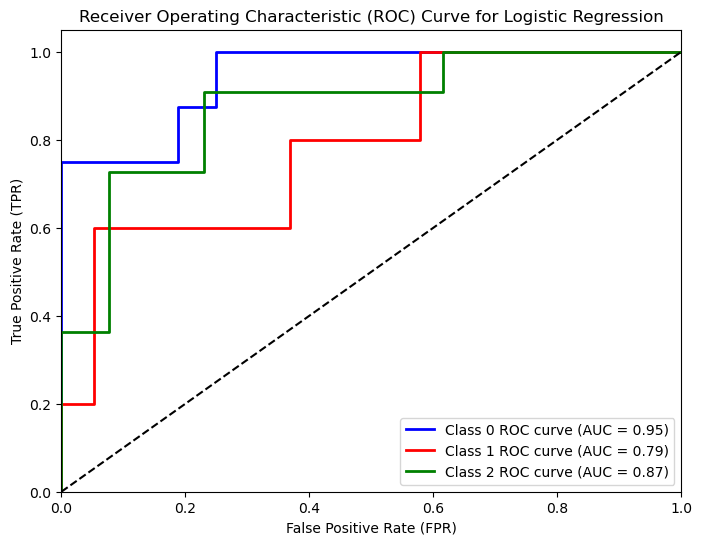

In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming you have previously defined train_labels_flat and test_labels_flat
# Assuming you have also defined Y_train and Y_test

# Binarize the true labels for multiclass classification
test_labels_bin = label_binarize(test_labels_flat, classes=np.unique(train_labels_flat))

# Make predictions on test data
y_test_pred = LR.predict_proba(test_images)

# Initialize variables to store ROC curve information
n_classes = len(np.unique(train_labels_flat))
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], y_test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'purple', 'orange'])  # You can extend this list for more classes
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# Insights :

the rocfor logistic regression  is good but the accuracy is not satisfactory 

# Using Decision Tree Classifier :


In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
dt=DecisionTreeClassifier()
dt.fit(train_images, train_labels)
dt_p_test=dt.predict(test_images)



In [136]:
print(classification_report(test_labels, dt_p_test))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.38      0.60      0.46         5
           2       0.89      0.73      0.80        11

   micro avg       0.67      0.67      0.67        24
   macro avg       0.66      0.65      0.64        24
weighted avg       0.72      0.67      0.69        24
 samples avg       0.67      0.67      0.67        24



In [137]:
precision=precision_score(test_labels, dt_p_test,average='weighted') # 72 percent of postive prediction are actually true
precision

0.7236276455026455

In [138]:
f1score=f1_score(test_labels, dt_p_test,average='weighted')
print(f"f1score: {f1score}")

f1score: 0.6850427350427349


# Model comparison Report:

# Code to demonstrates the use of several regression algorithms to build predictive models :

#  For CNN :
    
  
 ### CNN with hyperparamter is give good accuracy of 0.9167   and val_accuracy of 0.9166
    

# Conclusion :

### According to above report CONVOCATIONAL NEURAL NETWORK(CNN) is giving satisfactory results, thus this is our best model.

According to the method we have used Neural Network (CNN) is more efficient than the Conventional machine alogorithms like:

logistic regression, decision tree classifier, random forest classifier because to get proper output we have to use several steps including data cleaning and feature engineering.

Thses two steps are not mendetory for neural network, thus it saves our lot of time and also give targeted results.


# Report on Challenges faced :
### To create a report which should include challenges you faced on data and what technique was used with proper reasoning.